In [135]:
%pylab inline
from IPython.display import Image
from matplotlib.font_manager import FontProperties
# matplotlib.rcParams.update({'font.size': 23,'legend.fontsize':25})#,'font.family': 'serif'})
# rc('axes', linewidth=2)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.gridspec as gridspec
pylab.rcParams.update({'font.size': 25,'legend.fontsize':25})#,'font.family': 'serif'})
pylab.rc('axes', linewidth=1)
params = {'text.usetex': True, 
          'text.latex.preamble': [r'\usepackage{cmbright}', r'\usepackage{amsmath}']}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


/home/weiszr/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['uniform']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
/home/weiszr/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [136]:
!ls
#import subprocess
#p = subprocess.Popen("pip install tqdm", stdout = subprocess.PIPE)
#out = p.stdout.read()
#print(out)

data		       Fig_compv2.eps  Fig_sloprough.eps  FigureDensity.ipynb
Draft_fig1.jpg	       Fig_compv2.pdf  Fig_sloprough.pdf  Figures_5.ipynb
Draft_fig2.jpg	       Fig_compv2.png  Fig_sloprough.png  src
Explore_Results.ipynb  Fig_compv2.svg  Figure_3.ipynb
Fig_4new.png	       Fig_mode.png    Figure_4.ipynb


In [137]:
def motion_space_p(fr_l,fd_l,dis_l,ca):
    len_mc_l = len(fr_l)
    fr_dis_l = []
    fd_dis_l = []
    fr_ndis_l = []
    fd_ndis_l = []
    for i_mc in range(len_mc_l):
        if max(dis_l[:,i_mc]) >= ca:
            fr_dis_l.append(fr_l[i_mc])
            fd_dis_l.append(fd_l[i_mc])
        if max(dis_l[:,i_mc]) < ca:
            fr_ndis_l.append(fr_l[i_mc])
            fd_ndis_l.append(fd_l[i_mc])
    fr_dis_l = array(fr_dis_l)
    fd_dis_l = array(fd_dis_l)
    fr_ndis_l = array(fr_ndis_l)
    fd_ndis_l = array(fd_ndis_l)
    return fr_dis_l,fd_dis_l,fr_ndis_l,fd_ndis_l


def motion_space_f(fr_l,fd_l,dis_l,sli_l,ca,da):
    len_mc_l = len(fr_l)
    fr_dis_sli_l = []
    fd_dis_sli_l = []
    fr_ndis_sli_l = []
    fd_ndis_sli_l = []
    fr_ndis_nsli_l = []
    fd_ndis_nsli_l = []

    for i_mc in range(len_mc_l):
        if max(dis_l[:,i_mc]) >= ca and max(sli_l[:,i_mc])>=da:
            fr_dis_sli_l.append(fr_l[i_mc])
            fd_dis_sli_l.append(fd_l[i_mc])
        if max(dis_l[:,i_mc]) < ca and max(sli_l[:,i_mc])>=da:
            fr_ndis_sli_l.append(fr_l[i_mc])
            fd_ndis_sli_l.append(fd_l[i_mc])
        if max(dis_l[:,i_mc]) < ca and max(sli_l[:,i_mc]) < da:
            fr_ndis_nsli_l.append(fr_l[i_mc])
            fd_ndis_nsli_l.append(fd_l[i_mc])

    fr_dis_sli_l = array(fr_dis_sli_l)
    fd_dis_sli_l = array(fd_dis_sli_l)
    fr_ndis_sli_l = array(fr_ndis_sli_l)
    fd_ndis_sli_l = array(fd_ndis_sli_l)
    fr_ndis_nsli_l = array(fr_ndis_nsli_l)
    fd_ndis_nsli_l = array(fd_ndis_nsli_l)

    return fr_dis_sli_l,fd_dis_sli_l,fr_ndis_sli_l,fd_ndis_sli_l,fr_ndis_nsli_l,fd_ndis_nsli_l



def trans_fr(fr_l,fu_l,froude,d_fd):
    n_fdr_l = len(fr_l)
    fu = []
    for i in range(n_fdr_l):
        if fr_l[i] >= froude - d_fd and fr_l[i] <= froude + d_fd:
            fu.append(fu_l[i])
    fu = asarray(fu)
    
    if len(fu)== 0:
        tt = amax(fu_l)
    else:
        tt = amin(fu)     
    return tt


def rotate_boulder(x0,y0,angle):
#    from numpy import append, array,zeros,cos,sin

    xP = zeros(len(x0))
    yP = zeros(len(x0))
    angle = angle
    for i in range(len(x0)):
        xP[i] = x0[i]*cos(angle) - y0[i] * sin(angle)
        yP[i] = x0[i]*sin(angle) + y0[i] * cos(angle)  
    return xP, yP

def make_outputfile(fig,tt='test',res=200):
    fname_eps = 'Fig_{t1}.eps'.format(t1=tt)
    fname_png = 'Fig_{t1}.png'.format(t1=tt)
    fname_pdf = 'Fig_{t1}.pdf'.format(t1=tt)
    fname_svg = 'Fig_{t1}.svg'.format(t1=tt)
    print("Making files with dpi={t4}:".format(t4=str(res)))
    fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
    print('\t - {t1}'.format(t1=fname_eps))
    fig.savefig(fname_png,dpi=res,bbox_inches='tight', transparent=True)
    print('\t - {t1}'.format(t1=fname_png))
    fig.savefig(fname_pdf,dpi=res,bbox_inches='tight', transparent=True)
    print('\t - {t1}'.format(t1=fname_pdf))    
    
def make_outputfile_d(outputtype,fig,tt='test',res=200):
#    jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
    fname_eps = 'Fig_{t1}.eps'.format(t1=tt)
    fname_png = 'Fig_{t1}.png'.format(t1=tt)
    fname_pdf = 'Fig_{t1}.pdf'.format(t1=tt)
#     fname_svg = 'Fig_{t1}.svg'.format(t1=tt)
    if outputtype=='eps':
        fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
    elif outputtype=='png':
        fig.savefig(fname_png,dpi=res,bbox_inches='tight', transparent=True)
    elif outputtype=='pdf':
        fig.savefig(fname_pdf,dpi=res,bbox_inches='tight', transparent=True)
    else:
        fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
        fig.savefig(fname_png,dpi=res,bbox_inches='tight', transparent=True)
        fig.savefig(fname_pdf,dpi=res,bbox_inches='tight', transparent=True)
#    fig.savefig(fname_svg,dpi=res,bbox_inches='tight', transparent=True)
#     print("Files '{t1}', '{t3}', '{t2} and {t5}' created, where the latter two have dpi={t4}".format(t1=fname_eps,t2=fname_png,t3=fname_pdf,t5=fname_svg,t4=str(res)))




In [138]:
import sys
print(sys.path)
sys.path.insert(0,'./src')
from helpers import *

['./src', '/home/weiszr/work/FigNewBoulder', '/home/weiszr/anaconda3/lib/python38.zip', '/home/weiszr/anaconda3/lib/python3.8', '/home/weiszr/anaconda3/lib/python3.8/lib-dynload', '', '/home/weiszr/anaconda3/lib/python3.8/site-packages', '/home/weiszr/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/home/weiszr/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/weiszr/.ipython']


In [139]:
sl_change = [0.0,15.]
#    dl_change = [0.1, 0.5,1.0,1.5, 2.0, 2.5,3.0, 3.5,4.0]

dl_change = [0.0,2.0,4.0]

#dl_change = [0.1]+ list(linspace(0.5,4.0,15))
m=0
al = 1.0
trans = []
froude_value = 1.2
df = 0.02



## Figure showing the timeseries

The draft of the figures is below. Note that (b) and (c) are switched.

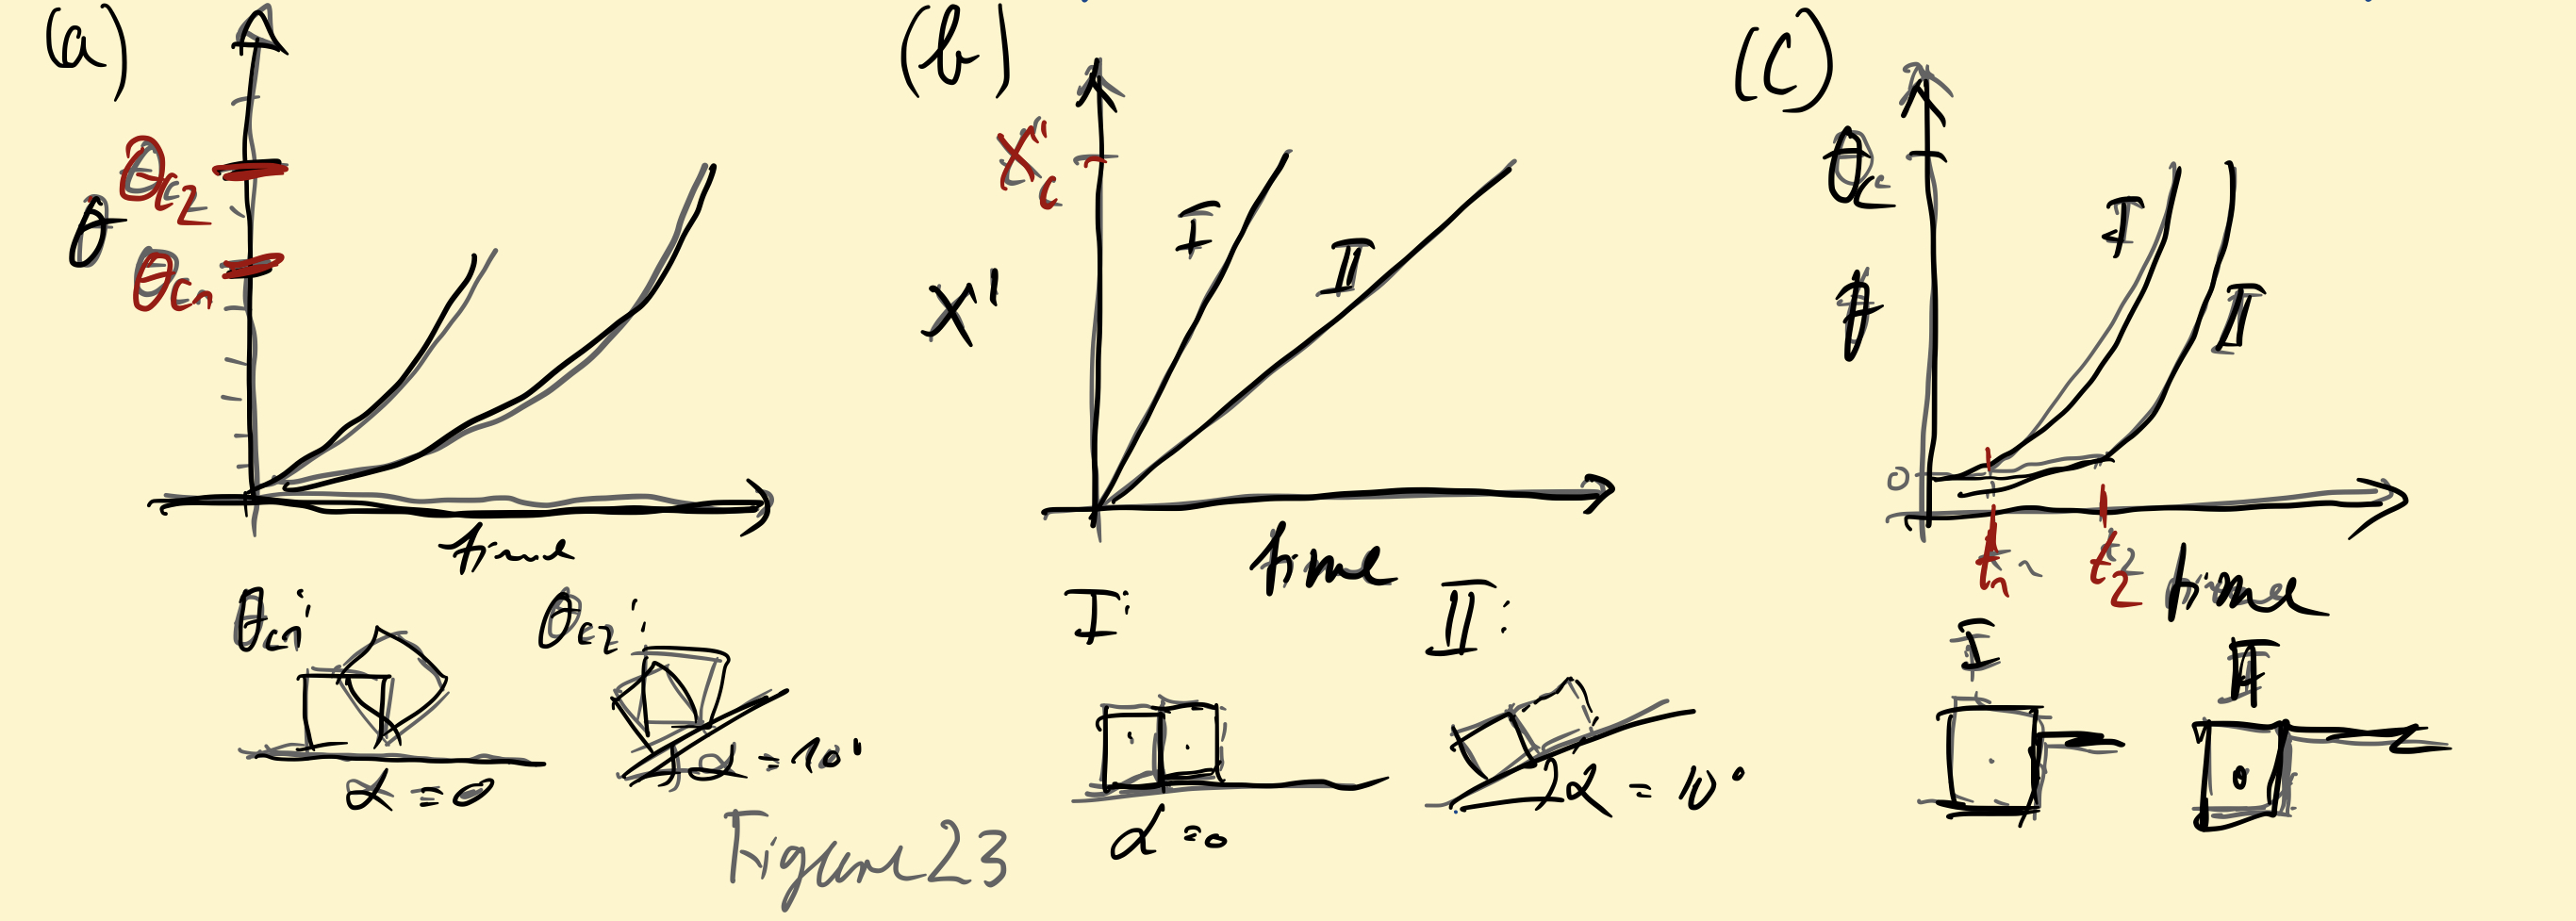

In [140]:
Image('Draft_fig1.jpg')

In [141]:
#fname1 = './data/density_222/out_slp00000_dlp00100_rotation.dat'
fname1 = './data/densitynew_0310b/out_slp00000_dlp00300_rotation.dat'
data_1 = loadtxt(fname1)
print('data_1: ',shape(data_1))
#fname2 = './data/density_222/out_slp05000_dlp00100_rotation.dat'
fname2 = './data/densitynew_0310b/out_slp15000_dlp00300_rotation.dat'
data_2 = loadtxt(fname2)
print('data_2: ',shape(data_2))
#fname3 = './data/density_222/out_slp00000_dlp00700_rotation.dat'
fname3 = './data/densitynew_0310b/out_slp00000_dlp00700_rotation.dat'
data_3 = loadtxt(fname3)
print('data_3: ',shape(data_3))
#fname4 = './data/out_slp0000_dlp0000_sliding.dat'
fname4 = './data/densitynew_0310b/out_slp00000_dlp00000_sliding.dat'
data_4 = loadtxt(fname4)
print('data_4: ',shape(data_4))
#fname5 = './data/out_slp1000_dlp0000_sliding.dat'
fname5 = './data/densitynew_0310b/out_slp15000_dlp00000_sliding.dat'
data_5 = loadtxt(fname5)
print('data_5: ',shape(data_5))


# #fname4 = './data/output_model_sliding_p00.dat'
# #fname5 = './data/output_model_sliding.dat'
# data_2 = loadtxt(fname2)


#data_4 = loadtxt(fname4)
#data_5 = loadtxt(fname5)

data_1:  (750, 100001)
data_2:  (750, 100001)
data_3:  (750, 100001)
data_4:  (750, 100001)
data_5:  (750, 100001)


241


(0.0, 5.0)

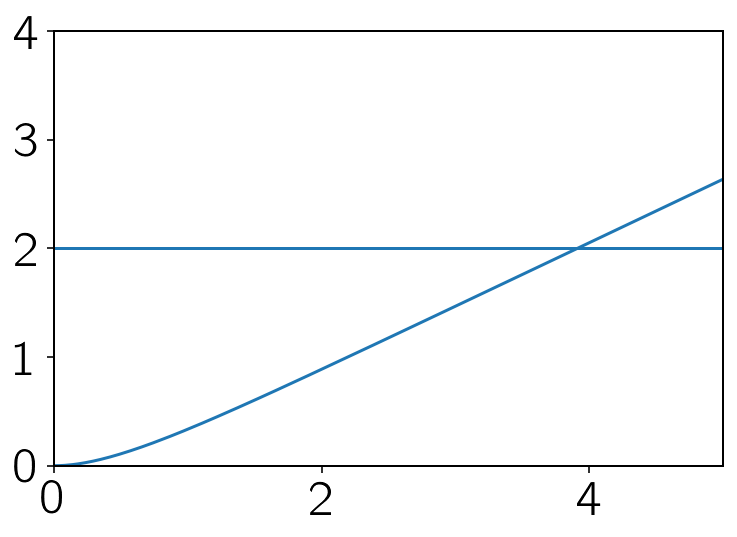

In [272]:
time_l = data_5[:,0]
data_l = data_5[:,1:]
nn=0
nx1 = 241
nx2 = 242
for i in range(nx1,nx2):  
    dummy = data_l[:,i]-data_l[1,i]
    print(i)
# #     print(data_l[1,i])
# #    dummy[dummy>0.5*np.pi]=np.nan
#     dummy[dummy>2]=np.nan
    plot(time_l,dummy)
axhline(2.0)
#plot(time_l,data_l[:,486+1]-data_l[1,486+1])
#plot(time_1,theta_1,'k-',lw=line_w)
#plot(time_2,theta_2,'r-',lw=line_w)
ylim(0,4)
xlim(0,5.)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
test angle 1.5707963267948966 90.0 0.0


(-14.671505121592272,
 11.880611343454833,
 -5.471564971654176,
 14.366312437220811)

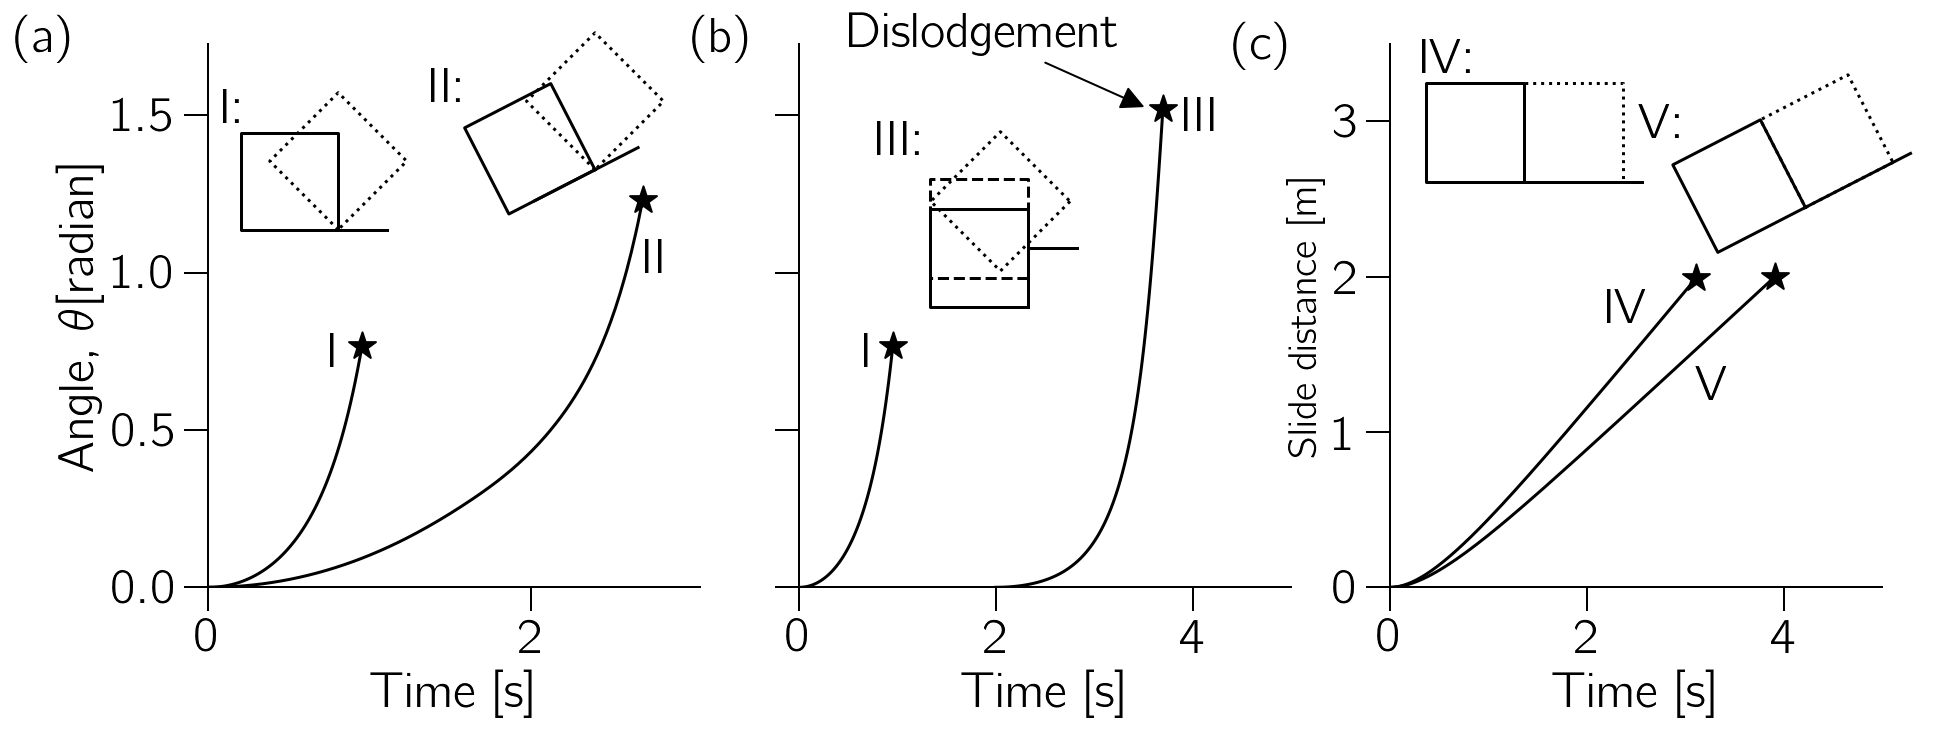

In [323]:


#finding the best mc_i's
#m1 = 103
#m2 = 110
#for i in range(m1,m2):
#    plot(time_1,data_1[:,i],'k-',alpha=0.5)
#    plot(time_2,data_2[:,i]-theta_2[0],'r-',alpha=0.5)

sl_x = [-7.0, 0.0, 5.0]
sl_y = [ 0.0, 0.0, 0.0]
r_x = [-7.0,0.0,0.0,5.0]
r_y = [-6.0,-6.0,0.0,0.0]
b_x = [0.0, -10.0, -10.0, 0.0, 0.0]
b_y = [0.0, 0.0, 10.0, 10.0, 0.0]
brou_x = zeros(len(b_x))
brou_y = zeros(len(b_x))
for i in range(len(b_x)):
    brou_y[i] = b_y[i]-6.0
brou_x[:] = b_x[:] 
al = 0.01
line_w=1.5
tick_length = 12
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
#fig = figure(figsize=(21,7))
# spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
# ax1 = fig.add_subplot(spec2[0, 0])
# ax2 = fig.add_subplot(spec2[0, 1])
# ax3 = fig.add_subplot(spec2[0, 2])


fig, (ax1,ax2,ax3) = subplots(nrows=1,ncols=3,figsize=(15,5)) 
#fig, (ax1,ax2,ax3) = subplots(nrows=1,ncols=3) 
#fig.tight_layout()
#subplots_adjust(wspace = .4)
###(a)
mc_i1 = 471
mc_i2 = 552
time_1 = data_1[:,0]
theta_1 = data_1[:,mc_i1+1]
theta_10 = theta_1[0]
theta_1[:] = theta_1[:] - theta_1[0]
theta_1c = 0.25*np.pi# - theta_10
theta_1[theta_1>theta_1c] = np.nan
theta_1 = theta_1[~np.isnan(theta_1)]
time_1 = time_1[0:len(theta_1)]
print(theta_10, theta_10*180./pi)
time_2 = data_2[:,0]
theta_2 = data_2[:,mc_i2+1]
theta_20 = theta_2[0]
theta_2[:] = theta_2[:] - theta_2[0]
theta_2c = 1.26
theta_2[theta_2>theta_2c] = np.nan
theta_2 = theta_2[~np.isnan(theta_2)]
time_2 = time_2[0:len(theta_2)]
print(theta_20, theta_20*180./pi)
dtheta = theta_2[0] - theta_1[0]
print(dtheta, dtheta*180./pi)
rsl_x,rsl_y=rotate_boulder(sl_x,sl_y,abs(theta_1c -theta_2c))
rb_x1,rb_y1=rotate_boulder(b_x,b_y,-abs(theta_1c))


rb_x2,rb_y2=rotate_boulder(b_x,b_y,abs(theta_1c -theta_2c))
rrb_x2,rrb_y2=rotate_boulder(b_x,b_y,-abs(theta_1c))

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=tick_length)

ax1.plot(time_1,theta_1,'k-',lw=line_w)
ax1.scatter(time_1[-1],theta_1[-1], marker='*',s=200,c='k')
ax1.plot(time_2,theta_2,'k-',lw=line_w)
ax1.scatter(time_2[-1],theta_2[-1], marker='*',s=200,c='k')


ax1.set_ylim(0.0, 1.1*(0.5*pi))
ax1.set_xlim(0,3.05)
ax1.set_xlabel('Time [s]', fontproperties=font)
ax1.set_ylabel(r'Angle, $\theta [\mathrm{radian}]$',fontproperties = font)
ax1.text(.75,0.7,"I")
ax1.text(2.7,1.,"II")
ax1.text(-1.2,1.7,"(a)")

ax1insa = zoomed_inset_axes(ax1,0.06,
                            bbox_to_anchor=(-.0,0.6,0.1,0.5),
                            bbox_transform=ax1.transAxes,
                            loc=2)
ax1insa.axis('off')
ax1insa.set_aspect('equal')
ax1insa.plot(array(sl_x[::-1])+7,sl_y,'k-',lw=line_w)
ax1insa.plot(array(b_x)+7,b_y,'k-',lw=line_w)
ax1insa.plot(rb_x1+7,rb_y1,'k:',lw=line_w)
ax1insa.text(-5,11,"I:")
offs1 = 1.5
ax1insb = zoomed_inset_axes(ax1,0.06,
                           bbox_to_anchor=(0.45,0.45,0.1,0.5),
                            bbox_transform=ax1.transAxes,
                           loc=3)
ax1insb.set_aspect('equal')
ax1insb.plot(rsl_x,rsl_y,'k-',lw=line_w)
ax1insb.plot(rb_x2,rb_y2,'k-',lw=line_w)
ax1insb.plot(rrb_x2,rrb_y2,'k:',lw=line_w)
ax1insb.text(-17,7,"II:")
ax1insb.axis('off')

###(b)
#mc_i1 = 34
mc_i3 = 825
time_3 = data_3[:,0]
theta_3 = data_3[:,mc_i3+1]
theta_30 = theta_3[0]
theta_3[:] = theta_3[:] - theta_30
theta_3c = theta_30
theta_3[theta_3>0.5*pi] = np.nan
theta_3 = theta_3[~np.isnan(theta_3)]
time_3 = time_3[0:len(theta_3)]
print(theta_30, theta_30*180./pi)
dtheta = 0.5*pi +abs(theta_30)
print('test angle',dtheta, dtheta*180./pi,theta_3c)
rr_x3,rr_y3=rotate_boulder(brou_x,brou_y,0.5*dtheta)#theta_3c-0.5*pi)
# rr_x3 = brou_x[:]+3.0
# rr_y3 = brou_y[:]+6.0
rr_x3 = rr_x3[:]
rr_y3 = rr_y3[:]+9.0
rr_x4 = brou_x[:]
rr_y4 = brou_y[:]+3.0


ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')


ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=tick_length)
ax2.plot(time_1,theta_1,'k-',lw=line_w)
ax2.scatter(time_1[-1],theta_1[-1], marker='*',s=200,c='k')
ax2.plot(time_3+2.0,theta_3,'k-',lw=line_w)
ax2.scatter(time_3[-1]+2.0,theta_3[-1], marker='*',s=200,c='k')
ax2.set_ylim(0.0, 1.1*(0.5*pi))
ax2.set_xlim(0,5)

ax2.annotate('Dislodgement', xy=(time_3[-1]+2.0-0.15,theta_3[-1]), xycoords='data',
                xytext=(-150, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle="-|>", color='k')
                )


ax2.set_xlabel('Time [s]')
ax2.set_yticklabels([])
#ax2.text(2.65,0.7,"I",)
ax2.text(.65,0.7,"I")
ax2.text(3.9,1.45,"III",fontproperties=font)

ax2.text(-1.1,1.7,"(b)",fontproperties=font)
ax2insa = zoomed_inset_axes(ax2,0.1,
                            bbox_to_anchor=(0.2,0.79,0.1,0.5),
                            bbox_transform=ax2.transAxes,
                            loc=2)
ax2insa.axis('off')
ax2insa.set_aspect('equal')
ax2insa.plot(r_x,r_y,'k-',lw=line_w)
ax2insa.plot(brou_x,brou_y,'k-',lw=line_w)
ax2insa.plot(rr_x3,rr_y3,'k:',lw=line_w)
ax2insa.plot(rr_x4,rr_y4,'k--',lw=line_w)

ax2insa.text(-15.5,9.5,"III:",fontproperties=font)


#ax2.set_ylabel(r'Angle, $\theta [^o]$',fontproperties = font)

###(c)
#spec2.update(wspace=0.5)
mc_i4 = 140
mc_i5 = 241
time_4 = data_4[:,0]
sl_4 = data_4[:,mc_i4+1]-data_4[0,mc_i4+1]
sl_4[sl_4>2.0] = np.nan
sl_4 = sl_4[~np.isnan(sl_4)]
time_4 = time_4[0:len(sl_4)]
time_5 = data_5[:,0]
sl_5 = data_5[:,mc_i5+1]-data_5[0,mc_i5+1]
sl_5[sl_5>2.0] = np.nan
sl_5 = sl_5[~np.isnan(sl_5)]
time_5 = time_5[0:len(sl_5)]
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')

ax3.tick_params(which='both', width=1)
ax3.tick_params(which='major', length=tick_length)
ax3.plot(time_4,sl_4,'k-',lw=line_w)
ax3.scatter(time_4[-1],sl_4[-1], marker='*',s=200,c='k')
ax3.plot(time_5,sl_5,'k-',lw=line_w)
ax3.scatter(time_5[-1],sl_5[-1], marker='*',s=200,c='k')
ax3.set_ylim(0.0,3.5)
ax3.set_xlabel('Time [s]', fontproperties=font)
#ax3.set_yticklabels([])
ax3.set_xlim(0,5.)
ax3.set_ylabel('Slide distance [m]',size=20,fontproperties = font)
ax3.text(-1.6,3.4,"(c)")
ax3.text(2.2,1.7,'IV')
ax3.text(3.1,1.2,'V')

sb_x = zeros(len(b_x))
sb_y = zeros(len(b_y))
for i in range(len(sb_x)):
    sb_x[i] = b_x[i]+10.0
sb_y[:] = b_y[:]

rsb_x,rsb_y=rotate_boulder(sb_x,sb_y,abs(theta_1c -theta_2c))

ax3insa = zoomed_inset_axes(ax3,0.1,
                            bbox_to_anchor=(0.0,0.54,0.1,0.5),
                            bbox_transform=ax3.transAxes,
                            loc=2)
sl_x=array(sl_x)
b_x=array(b_x)
ax3insa.axis('off')
ax3insa.set_aspect('equal')
ax3insa.plot(sl_x[::-1]+7,sl_y,'k-',lw=line_w)
ax3insa.plot(b_x,b_y,'k-',lw=line_w)
ax3insa.plot(sb_x[:],sb_y,'k:',lw=line_w)
ax3insa.text(-10.5,11,"IV:")


b_x = array(b_x)
rb_x2,rb_y2=rotate_boulder(b_x,b_y,abs(theta_1c -theta_2c))
rsl_x,rsl_y=rotate_boulder(sl_x+7,sl_y,abs(theta_1c -theta_2c))
ax3insb = zoomed_inset_axes(ax3,0.1,
                           bbox_to_anchor=(0.5,0.45,0.1,0.5),
                            bbox_transform=ax3.transAxes,
                           loc=3)
ax3insb.set_aspect('equal')
ax3insb.plot(rsl_x,rsl_y,'k-',lw=line_w)
ax3insb.plot(rb_x2,rb_y2,'k-',lw=line_w)
ax3insb.plot(rsb_x,rsb_y,'k:',lw=line_w)
ax3insb.text(-17,7.0,"V:",fontproperties=font)
ax3insb.axis('off')


In [324]:
##### make_outputfile(fig,'time_series',300)
make_outputfile_d('png',fig,tt='mode',res=400)